# SURAJ VERMA
# The Sparks Foundation Internship
# TASK #2 - Unsupervised Learning
# Clustering using K-Means clustering algorithm

In [1]:
# Importing the required libraries.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

In [2]:
# Reading the csv file.

df = pd.read_csv('Iris.csv')

# Displayinng the first five elements of the dataframe.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Unique values in the Species column - 3.
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
# Dropping the target values column because we are making an unsupervised model using the K-means clustering algorithm.

X = df.drop(['Species', 'Id'], axis=1)

In [5]:
# Displayinng the first five elements of the inputs.

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Converting the inputs to numpy array.
X = X.to_numpy()

# Shuffling out inputs.
X = shuffle(X, random_state=42)

# Input(X) shape.
X.shape

(150, 4)

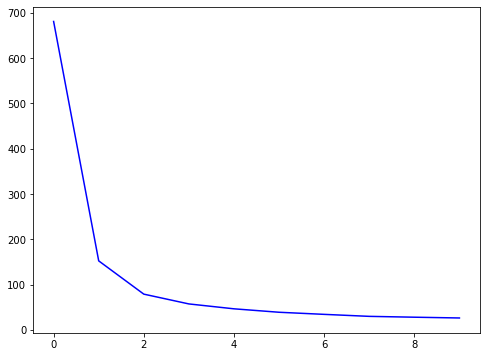

In [7]:
# Importing the KMeans from sklearn.
from sklearn.cluster import KMeans


# Now, when we do unsupervised learning most of the times we don't know how many classes there are.
# To find out the number of classes we use The Elbow Method. We train the model for different values of classes(c) 
# and look at the loss as we increase the number of classes and plot it. 

# As you can see the curve looks like a hand and around the value 2-3 we can see the elbow of the hand.
# In this case we take number of classes(c) as 3.


cost = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42, max_iter=1000)
    kmeans.fit(X)
    cost.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(8,6))
plt.plot([i for i in range(len(cost))], cost, 'b-')

In [8]:
# Training
clusters = KMeans(n_clusters=3, max_iter=1000, random_state=42)

# Predicting
preds = clusters.fit_predict(X)

In [9]:
preds #Predictions

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 1,
       1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2,
       2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0,
       1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0])

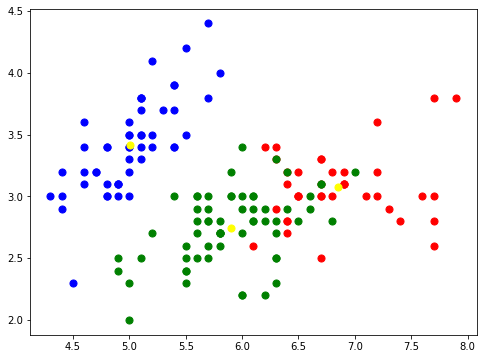

In [10]:
# Plotting the first two features of X and plooting the clusters with their centroids.

fig = plt.figure(figsize=(8,6))
plt.scatter(list(X[preds == 0, 0]), list(X[preds == 0, 1]), 
            s = 50, c = 'red', label = 'Iris-setosa')

plt.scatter(list(X[preds == 1, 0]), list(X[preds == 1, 1]), 
            s = 50, c = 'blue', label = 'Iris-versicolour')

plt.scatter(list(X[preds == 2, 0]), list(X[preds == 2, 1]),
            s = 50, c = 'green', label = 'Iris-virginica')

plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

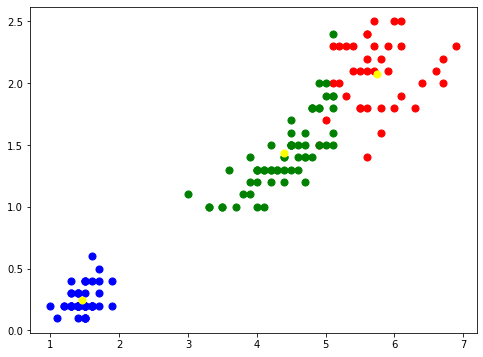

In [11]:
# Plotting the last two features of X and plooting the clusters with their centroids.

fig = plt.figure(figsize=(8,6))
plt.scatter(list(X[preds == 0, 2]), list(X[preds == 0, 3]), 
            s = 50, c = 'red', label = 'Iris-setosa')

plt.scatter(list(X[preds == 1, 2]), list(X[preds == 1, 3]), 
            s = 50, c = 'blue', label = 'Iris-versicolour')

plt.scatter(list(X[preds == 2, 2]), list(X[preds == 2, 3]),
            s = 50, c = 'green', label = 'Iris-virginica')

plt.scatter(clusters.cluster_centers_[:, 2], clusters.cluster_centers_[:,3], 
            s = 50, c = 'yellow', label = 'Centroids')